We place conjugate prior distributions on the unknown mean and variance, i.e. the mean also follows a Gaussian distribution while the precision follows a [[gamma distribution]].  In other words:


$$\begin{align}
\mu & \sim \mathcal{N}(\mu_0, (\lambda_0 \tau)^{-1}) \\
\tau & \sim \operatorname{Gamma}(a_0, b_0) \\
\{x_1, \dots, x_N\} & \sim \mathcal{N}(\mu, \tau^{-1}) \\
N &= \text{number of data points}
\end{align}$$


We are given $N$ data points $\mathbf{X} = \{x_{1}, \dots, x_N\}$ and our goal is to infer the [[posterior distribution]] $q(\mu, \tau)=p(\mu,\tau\mid x_{1}, \ldots, x_N)$ of the parameters $\mu$ and $\tau$.

The [[hyperparameter]]s $\mu_0$, $\lambda_0$, $a_0$ and $b_0$ are fixed, given values.  They can be set to small positive numbers to give broad prior distributions indicating ignorance about the prior distributions of $\mu$ and $tau$.

## The joint probability

The [[joint probability]] of all variables can be rewritten as

$$p(\mathbf{X},\mu,\tau) = p(\mathbf{X}\mid \mu,\tau) p(\mu\mid \tau) p(\tau)$$

where the individual factors are


$$\begin{align}
p(\mathbf{X}\mid \mu,\tau) & = \prod_{n=1}^N \mathcal{N}(x_n\mid \mu,\tau^{-1}) \\
p(\mu\mid \tau) & = \mathcal{N}(\mu\mid \mu_0, (\lambda_0 \tau)^{-1}) \\
p(\tau) & = \operatorname{Gamma}(\tau\mid a_0, b_0)
\end{align}$$


where


$$\begin{align}
\mathcal{N}(x\mid \mu,\sigma^2) & = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}} \\
\operatorname{Gamma}(\tau\mid a,b) & = \frac{1}{\Gamma(a)} b^a \tau^{a-1} e^{-b \tau}
\end{align}$$



## Factorized approximation
Assume that $q(\mu,\tau) = q(\mu)q(\tau)$, i.e. that the posterior distribution factorizes into independent factors for $\mu$ and $\tau$.  This type of assumption underlies the variational Bayesian method.  The true posterior distribution does not in fact factor this way (in fact, in this simple case, it is known to be a [[Gaussian-gamma distribution]]), and hence the result we obtain will be an approximation.


## Derivation of q($\mu$)

Then

$$\begin{align}
\ln q_\mu^*(\mu) &= \operatorname{E}_{\tau}\left[\ln p(\mathbf{X}\mid \mu,\tau) + \ln p(\mu\mid \tau) + \ln p(\tau)\right] + C \\\\
 &= \operatorname{E}_{\tau}\left[\ln p(\mathbf{X}\mid \mu,\tau)\right] + \operatorname{E}_{\tau}\left[\ln p(\mu\mid \tau)\right] + \operatorname{E}_{\tau}\left[\ln p(\tau)\right] + C \\\\
 &= \operatorname{E}_{\tau}\left[\ln \prod_{n=1}^N \mathcal{N}(x_n\mid \mu,\tau^{-1})\right] + \operatorname{E}_{\tau}\left[\ln \mathcal{N}(\mu\mid \mu_0, (\lambda_0 \tau)^{-1})\right] + C_2 \\\\
 &= \operatorname{E}_{\tau}\left[\ln \prod_{n=1}^N \sqrt{\frac{\tau}{2\pi}} e^{-\frac{(x_n-\mu)^2\tau}{2}}\right] + \operatorname{E}_{\tau}\left[\ln \sqrt{\frac{\lambda_0 \tau}{2\pi}} e^{-\frac{(\mu-\mu_0)^2\lambda_0 \tau}{2}}\right] + C_2 \\\\
 &= \operatorname{E}_{\tau}\left[\sum_{n=1}^N \left(\frac{1}{2}(\ln\tau - \ln 2\pi) - \frac{(x_n-\mu)^2\tau}{2})\right)\right] + \operatorname{E}_{\tau}\left[\frac{1}{2}(\ln \lambda_0 + \ln \tau - \ln 2\pi) - \frac{(\mu-\mu_0)^2\lambda_0 \tau}{2}\right] + C_2 \\\\
 &= \operatorname{E}_{\tau}\left[\sum_{n=1}^N -\frac{(x_n-\mu)^2\tau}{2}\right] + \operatorname{E}_{\tau}\left[-\frac{(\mu-\mu_0)^2\lambda_0 \tau}{2}\right] + \operatorname{E}_{\tau}\left[\sum_{n=1}^N \frac{1}{2}(\ln\tau - \ln 2\pi)\right] + \operatorname{E}_{\tau}\left[\frac{1}{2}(\ln \lambda_0 + \ln \tau - \ln 2\pi)\right] + C_2 \\\\
 &= \operatorname{E}_{\tau}\left[\sum_{n=1}^N -\frac{(x_n-\mu)^2\tau}{2}\right] + \operatorname{E}_{\tau}\left[-\frac{(\mu-\mu_0)^2\lambda_0 \tau}{2}\right] + C_3 \\\\
 &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \left\{ \sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu-\mu_0)^2 \right\} + C_3
\end{align}$$


In the above derivation, $C$, $C_2$ and $C_3$ refer to values that are constant with respect to $\mu$.  Note that the term $\operatorname{E}_{\tau}[\ln p(\tau)]$ is not a function of $\mu$ and will have the same value regardless of the value of $\mu$.  Hence in line 3 we can absorb it into the constant term at the end.  We do the same thing in line 7.

The last line is simply a quadratic polynomial in $\mu$.  Since this is the logarithm of $q_\mu^*(\mu)$, we can see that $q_\mu^*(\mu)$ itself is a [[Gaussian distribution]]. 

With a certain amount of tedious math (expanding the squares inside of the braces, separating out and grouping the terms involving $\mu$ and $\mu^2$ and [[completing the square]] over $\mu$), we can derive the parameters of the Gaussian distribution:

$$
\begin{align}
\ln q_\mu^*(\mu) &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \{ \sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu-\mu_0)^2 \} + C_3 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \{ \sum_{n=1}^N (x_n^2-2x_n\mu + \mu^2) + \lambda_0(\mu^2-2\mu_0\mu + \mu_0^2) \} + C_3 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \{ (\sum_{n=1}^N x_n^2)-2(\sum_{n=1}^N x_n)\mu + (\sum_{n=1}^N \mu^2) + \lambda_0\mu^2-2\lambda_0\mu_0\mu + \lambda_0\mu_0^2 \} + C_3 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \{ (\lambda_0+N)\mu^2 -2(\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n)\mu + (\textstyle\sum_{n=1}^N x_n^2) + \lambda_0\mu_0^2 \} + C_3 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \{ (\lambda_0+N)\mu^2 -2(\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n)\mu \} + C_4 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \left\{ (\lambda_0+N)\mu^2 -2\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N}(\lambda_0+N) \mu \right\} + C_4 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \left\{ (\lambda_0+N)\left(\mu^2 -2\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N} \mu\right) \right\} + C_4 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \left\{ (\lambda_0+N)\left(\mu^2 -2\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N} \mu + \left(\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N}\right)^2 - \left(\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N}\right)^2\right) \right\} + C_4 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \left\{ (\lambda_0+N)\left(\mu^2 -2\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N} \mu + \left(\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N}\right)^2 \right) \right\} + C_5 \\
                    &= - \frac{\operatorname{E}_{\tau}[\tau]}{2} \left\{ (\lambda_0+N)\left(\mu-\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N}\right)^2 \right\} + C_5 \\
                    &= - \frac{1}{2} \left\{ (\lambda_0+N)\operatorname{E}_{\tau}[\tau] \left(\mu-\frac{\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n}{\lambda_0+N}\right)^2 \right\} + C_5 \\
\end{align}$$

Note that all of the above steps can be shortened by using the formula for the [[Normal distribution#Sum_of_two_quadratics|sum of two quadratics]].

In other words:

$$
\begin{align}
q_\mu^*(\mu) &\sim \mathcal{N}(\mu\mid \mu_N,\lambda_N^{-1}) \\
\mu_N &= \frac{\lambda_0 \mu_0 + N \bar{x}}{\lambda_0 + N} \\
\lambda_N &= (\lambda_0 + N) \operatorname{E}[\tau] \\
\bar{x} &= \frac{1}{N}\sum_{n=1}^N x_n
\end{align}$$



## Derivation of q($\tau$)

The derivation of $q_\tau^*(\tau)$ is similar to above, although we omit some of the details for the sake of brevity.


$$\begin{align}
\ln q_\tau^*(\tau) &= \operatorname{E}_{\mu}[\ln p(\mathbf{X}\mid \mu,\tau) + \ln p(\mu\mid \tau)] + \ln p(\tau) + \text{constant} \\
                    &= (a_0 - 1) \ln \tau - b_0 \tau + \frac{1}{2} \ln \tau + \frac{N}{2} \ln \tau - \frac{\tau}{2} \operatorname{E}_\mu [\sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu - \mu_0)^2] + \text{constant}
\end{align}$$


Exponentiating both sides, we can see that $q_\tau^*(\tau)$ is a [[gamma distribution]].  Specifically:


$$\begin{align}
q_\tau^*(\tau) &\sim \operatorname{Gamma}(\tau\mid a_N, b_N) \\
a_N &= a_0 + \frac{N+1}{2} \\
b_N &= b_0 + \frac{1}{2} \operatorname{E}_\mu \left[\sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu - \mu_0)^2\right]
\end{align}$$



## Algorithm for computing the parameters

Let us recap the conclusions from the previous sections:


$$\begin{align}
q_\mu^*(\mu) &\sim \mathcal{N}(\mu\mid\mu_N,\lambda_N^{-1}) \\
\mu_N &= \frac{\lambda_0 \mu_0 + N \bar{x}}{\lambda_0 + N} \\
\lambda_N &= (\lambda_0 + N) \operatorname{E}[\tau] \\
\bar{x} &= \frac{1}{N}\sum_{n=1}^N x_n
\end{align}$$


and


$$\begin{align}
q_\tau^*(\tau) &\sim \operatorname{Gamma}(\tau\mid a_N, b_N) \\
a_N &= a_0 + \frac{N+1}{2} \\
b_N &= b_0 + \frac{1}{2} \operatorname{E}_\mu \left[\sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu - \mu_0)^2\right]
\end{align}$$



In each case, the parameters for the distribution over one of the variables depend on expectations taken with respect to the other variable.  We can expand the expectations, using the standard formulas for the expectations of moments of the Gaussian and gamma distributions:


$$\begin{align}
\operatorname{E}[\tau\mid a_N, b_N] &= \frac{a_N}{b_N} \\
\operatorname{E}[\mu\mid\mu_N,\lambda_N^{-1}] &= \mu_N \\
\operatorname{E}\left[X^2 \right] &= \operatorname{Var}(X) + (\operatorname{E}[X])^2 \\
\operatorname{E}[\mu^2\mid\mu_N,\lambda_N^{-1}] &= \lambda_N^{-1} + \mu_N^2
\end{align}$$



Applying these formulas to the above equations is trivial in most cases, but the equation for $b_N$ takes more work:


$$\begin{align}
b_N &= b_0 + \frac{1}{2} \operatorname{E}_\mu \left[\sum_{n=1}^N (x_n-\mu)^2 + \lambda_0(\mu - \mu_0)^2\right] \\
 &= b_0 + \frac{1}{2} \operatorname{E}_\mu \left[ (\lambda_0+N)\mu^2 -2(\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n)\mu + (\textstyle\sum_{n=1}^N x_n^2) + \lambda_0\mu_0^2 \right] \\
 &= b_0 + \frac{1}{2} \left[ (\lambda_0+N)\operatorname{E}_\mu[\mu^2] -2(\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n)\operatorname{E}_\mu[\mu] + (\textstyle\sum_{n=1}^N x_n^2) + \lambda_0\mu_0^2 \right] \\
 &= b_0 + \frac{1}{2} \left[ (\lambda_0+N)(\lambda_N^{-1} + \mu_N^2) -2(\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n)\mu_N + (\textstyle\sum_{n=1}^N x_n^2) + \lambda_0\mu_0^2 \right] \\
\end{align}$$




We can then write the parameter equations as follows, without any expectations:


$$\begin{align}
\mu_N &= \frac{\lambda_0 \mu_0 + N \bar{x}}{\lambda_0 + N} \\
\lambda_N &= (\lambda_0 + N) \frac{a_N}{b_N} \\
\bar{x} &= \frac{1}{N}\sum_{n=1}^N x_n \\
a_N &= a_0 + \frac{N+1}{2} \\
b_N &= b_0 + \frac{1}{2} \left[ (\lambda_0+N)(\lambda_N^{-1} + \mu_N^2) -2(\lambda_0\mu_0 + \textstyle\sum_{n=1}^N x_n)\mu_N + (\textstyle\sum_{n=1}^N x_n^2) + \lambda_0\mu_0^2 \right]
\end{align}$$



Note that there are circular dependencies among the formulas for $\mu_N$, $\lambda_N$ and $b_N$.  This naturally suggests an [[expectation-maximization algorithm|EM]]-like algorithm:

+ Compute $\sum_{n=1}^N x_n$ and $\sum_{n=1}^N x_n^2.$ Use these values to compute $\mu_N$ and $a_N.$
+ Initialize $\lambda_N$ to some arbitrary value.
+ Use the current value of $\lambda_N,$ along with the known values of the other parameters, to compute $b_N$.
+ Use the current value of $b_N,$ along with the known values of the other parameters, to compute $\lambda_N$.
+ Repeat the last two steps until convergence (i.e. until neither value has changed more than some small amount).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

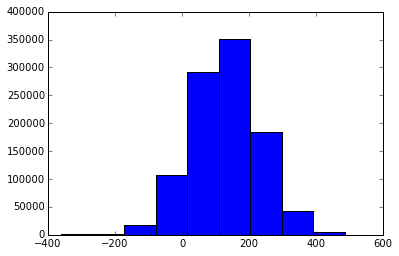

In [2]:
true_mu = 130
true_tau = 0.01
N = 1000000
samples = random.normal(true_mu,1/true_tau,N)
_ = plt.hist(samples)

In [3]:
from scipy.stats import norm
import matplotlib.mlab as mlab

Tau 0.00908848878788
Tau 0.00999717034424
Tau 0.00999717035424
Tau 0.00999717035424
Tau 0.00999717035424


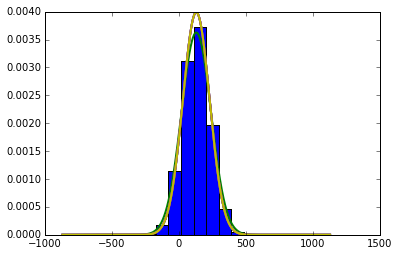

In [4]:
a_0 = 100
b_0 = 20

lambda_0 = 100
mu_0 = -100

x_ = np.sum(samples)
x__ = np.sum(samples**2)

def VB(samples,lambda_N):
  global x_,x__
  N = samples.shape[0]
  mu_N = (lambda_0*mu_0+x_)/(lambda_0+N)
  a_N = a_0*(N+1)/2.0
  b_N = b_0+(1.0/2)*((lambda_0+N)*(1.0/lambda_N+mu_N**2)-2.0*(lambda_0*mu_0+x_)*mu_N+x__+lambda_0*mu_0**2)
  lambda_N_new = (lambda_0+N) * a_N/b_N
  return lambda_N_new,a_N,b_N


plt.hist(samples,weights=np.repeat(1.0/samples.shape[0], samples.shape[0]),normed=True)
plt.plot(np.arange(-1000,1000,1)+true_mu,mlab.normpdf(np.arange(-1000,1000,1)+true_mu,true_mu,1.0/true_tau),'b',
         linewidth=2)
lamb = 0.001
a_N,b_N = 0,0
for i in range(5):
  lamb_,a_N,b_N = VB(samples, lamb)
  mu_N = (lambda_0*mu_0+x_)/(lambda_0+N)

  print("Tau",a_N/b_N)
  plt.plot(np.arange(-1000,1000,1)+true_mu,norm.pdf(np.arange(-1000,1000,1)+true_mu,mu_N,b_N/a_N),linewidth=2)
  lamb = lamb_